# Example use of the pywaf package

In [3]:
import datetime
from pywaf import Api

## Fetch $SO_{2}$ concentrations at ground level using the Umhverfisstonum API

In [4]:
# initialise the API object ...
api = Api(
    # ... which will store fetched data in the local_storage directory ...
    local_storage="local_storage/"
)

# ...the API object will search for data from stations that ...
result = api.get_data(

    # ... lie within this bounding box ...
    minlat = 63.7, 
    maxlat = 64.3,
    minlon = -23.0,
    maxlon = -21.0,

    # ... and were operational at some point between these two dates ...
    start = datetime.datetime(2021,7,18),
    end = datetime.datetime(2021,7,20),

    # ... for this species:
    species = 'SO2'

    # If the data is present in local_storage, that data will be returned,
    # otherwise, it will fetch the data using the Umhverfisstofnum API 
)


2021-07-18.nc not found, fetching data using API
fetching date 2021-07-18 from Ust api
2021-07-19.nc not found, fetching data using API
fetching date 2021-07-19 from Ust api
23 stations between 2021-07-18 00:00:00 and 2021-07-20 00:00:00
16 stations measuring SO2
9 within bounding box 63.7 64.3 -23.0 -21.0


In [5]:
# the results are stored in an xarray dataset that can be saved to disk as a netcdf file
result

<xarray.Dataset>
Dimensions:                       (endtime: 48)
Coordinates:
  * endtime                       (endtime) datetime64[ns] 2021-07-18 ... 202...
Data variables: (12/18)
    STA-IS0044A#SO2#value         (endtime) float64 17.09 17.11 ... 17.14 17.06
    STA-IS0044A#SO2#verification  (endtime) float64 3.0 3.0 3.0 ... 3.0 3.0 3.0
    STA-IS0002A#SO2#value         (endtime) float64 2.709 3.299 ... 2.801 3.139
    STA-IS0002A#SO2#verification  (endtime) float64 1.0 1.0 1.0 ... 1.0 1.0 1.0
    STA-IS0046A#SO2#value         (endtime) float64 4.837 5.11 ... 7.955 7.626
    STA-IS0046A#SO2#verification  (endtime) float64 1.0 1.0 1.0 ... 1.0 1.0 1.0
    ...                            ...
    STA-IS0057A#SO2#value         (endtime) float64 0.4 0.5333 ... 3.467 3.067
    STA-IS0057A#SO2#verification  (endtime) float64 3.0 3.0 3.0 ... 3.0 3.0 3.0
    STA-IS0005A#SO2#value         (endtime) float64 2.824 2.092 ... 3.765 3.941
    STA-IS0005A#SO2#verification  (endtime) float64 1.0 1.0 1.0 ... 1.0 1.0 1.0
    STA-IS0058A#SO2#value         (endtime) float64 4.981 4.923 ... 5.004 5.191
    STA-IS0058A#SO2#verification  (endtime) float64 3.0 3.0 3.0 ... 3.0 3.0 3.0
Attributes: (12/24)
    STA-IS0052A:    Akureyri Strandgata (við Hof)
    STA-IS0053A:    Eyjavellir, Reykjanesbær
    STA-IS0044A:    Grindavík Nesvegur
    STA-IS0041A:    Grundartangi Gröf
    STA-IS0025A:    Grundartangi Kríuvarða
    STA-IS0048A:    Grundartangi Melahverfi
    ...             ...
    STA-IS0028A:    Reyðarfjörður Ljósá stöð 2
    STA-IS0005A:    Reykjavik Grensas
    STA-IS0006A:    Reykjavik Husdyragardurinn
    STA-IS0054A:    Úlfarsárdalur Lambhaga OR
    STA-IS0058A:    Vogar tjaldstæði
    creation date:  2024-09-19 17:34:55.563430

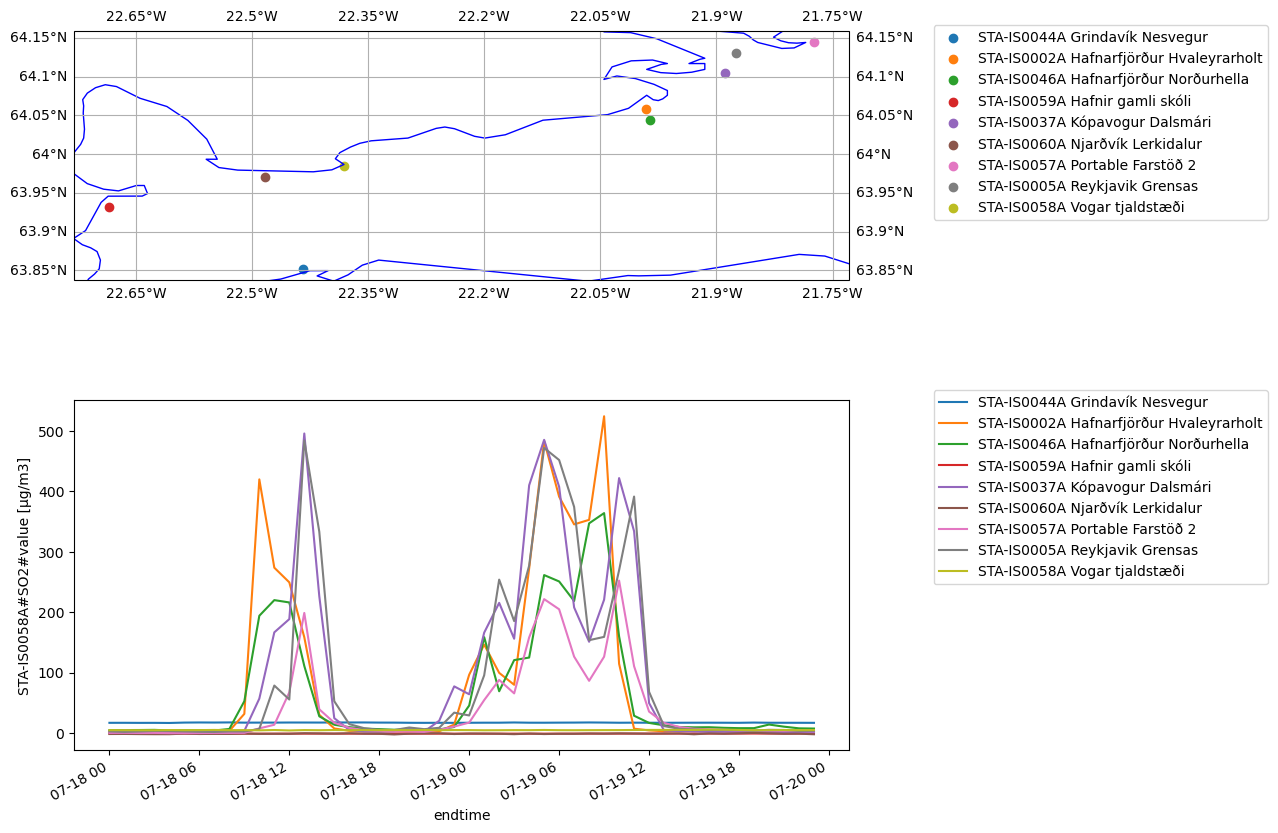

In [6]:
# the package also contains a useful plotting function for getting an overview of the data
api.plot_data(result)

In [7]:
# save the dataset as an example of DT5402
result.to_netcdf("dt5402_example.nc")